In [3]:
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm

In [11]:
df1=pd.read_csv('Toyota_Corolla.csv',encoding='latin1')
df1.head()

<IPython.core.display.Javascript object>

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [13]:
df1.shape

(1436, 38)

In [15]:
df=df1[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [17]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [24]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


<IPython.core.display.Javascript object>

<AxesSubplot:>

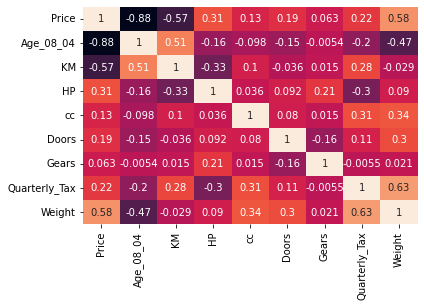

In [19]:
sns.heatmap(df.corr(),annot=True,cbar=False)

<IPython.core.display.Javascript object>

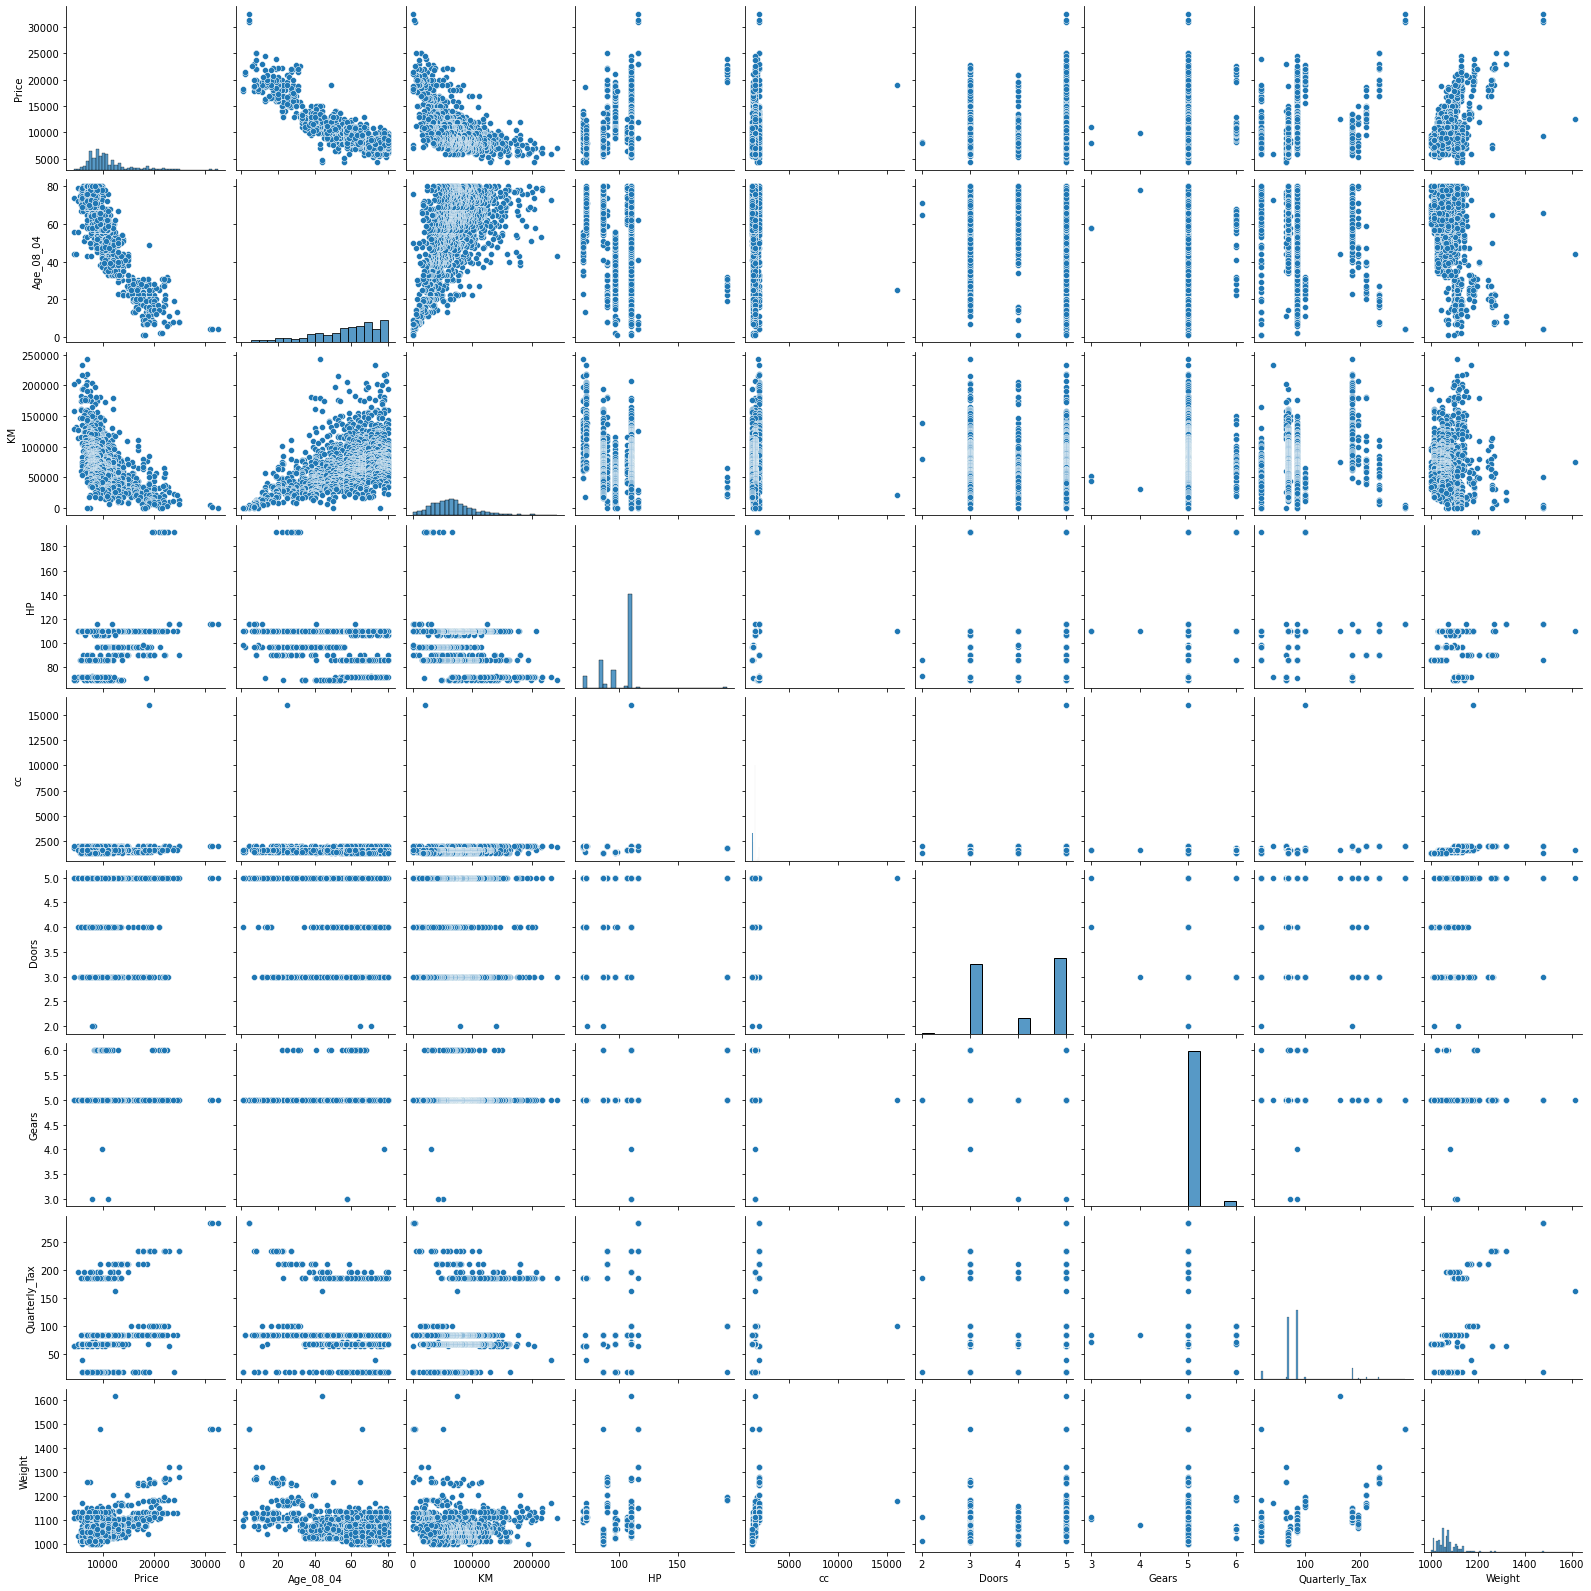

In [21]:
sns.pairplot(df)

In [23]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()
model.rsquared

0.8637627463428192

<IPython.core.display.Javascript object>

eval_env: 1


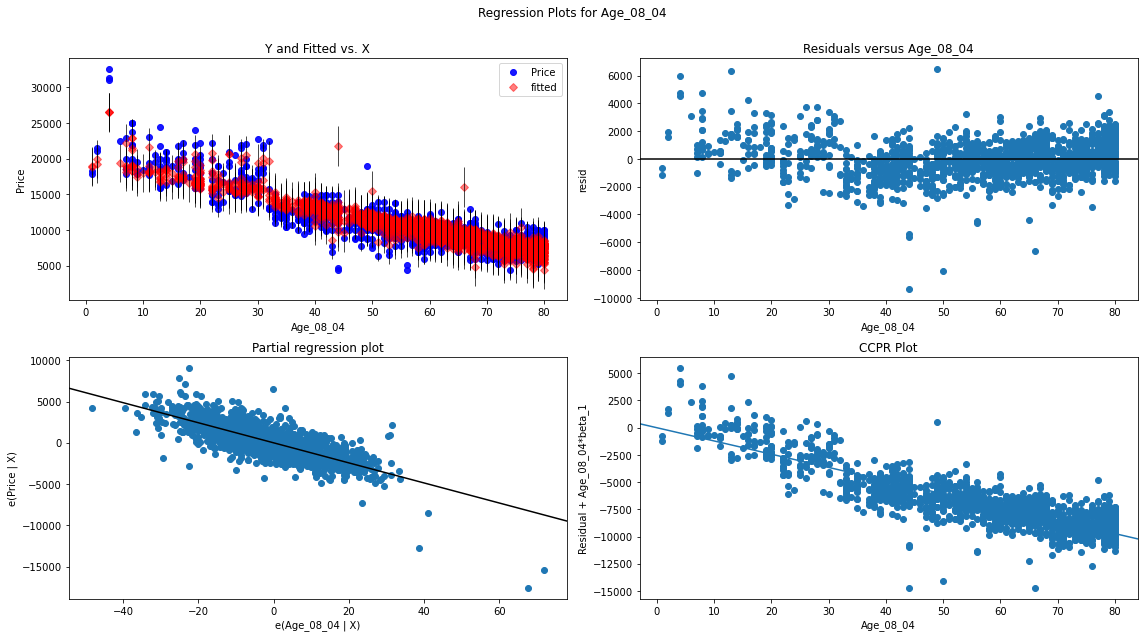

In [26]:
fig=plt.figure(figsize=(16,9))
fig=sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)

<IPython.core.display.Javascript object>

eval_env: 1


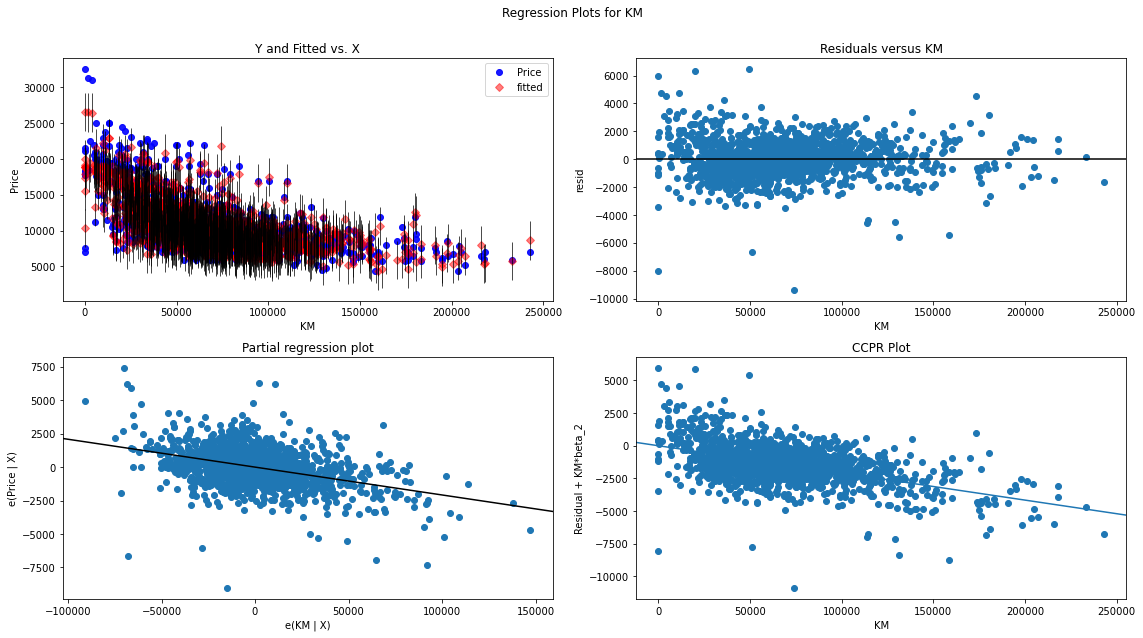

In [27]:
fig=plt.figure(figsize=(16,9))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig)

<IPython.core.display.Javascript object>

eval_env: 1


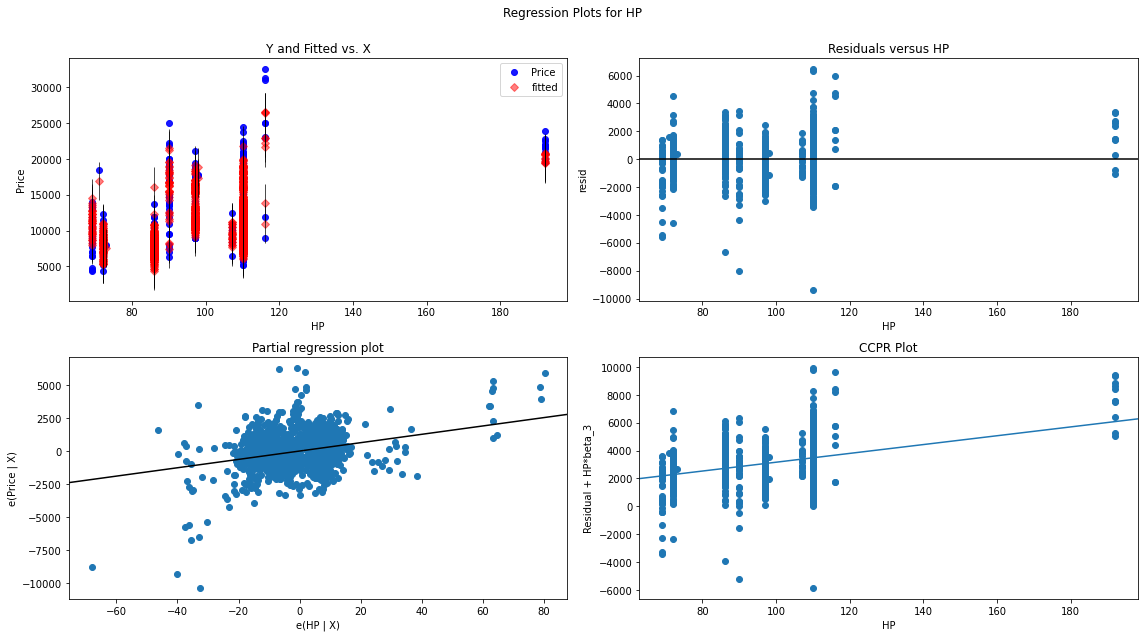

In [28]:
fig=plt.figure(figsize=(16,9))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)

<IPython.core.display.Javascript object>

eval_env: 1


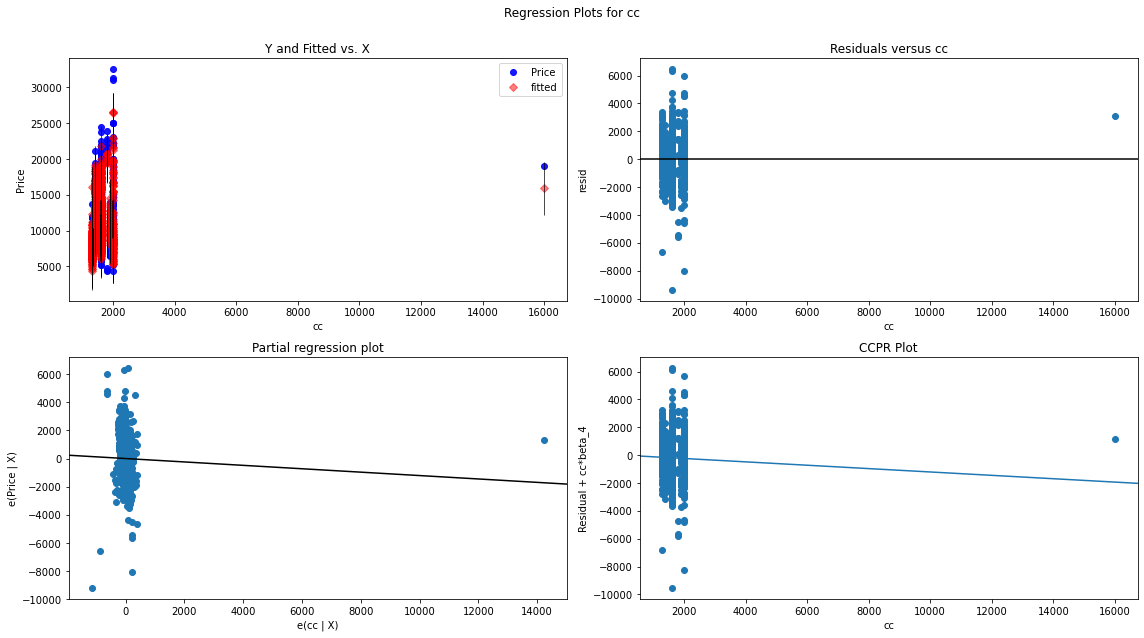

In [29]:
fig=plt.figure(figsize=(16,9))
fig=sm.graphics.plot_regress_exog(model,'cc',fig=fig)

<IPython.core.display.Javascript object>

eval_env: 1


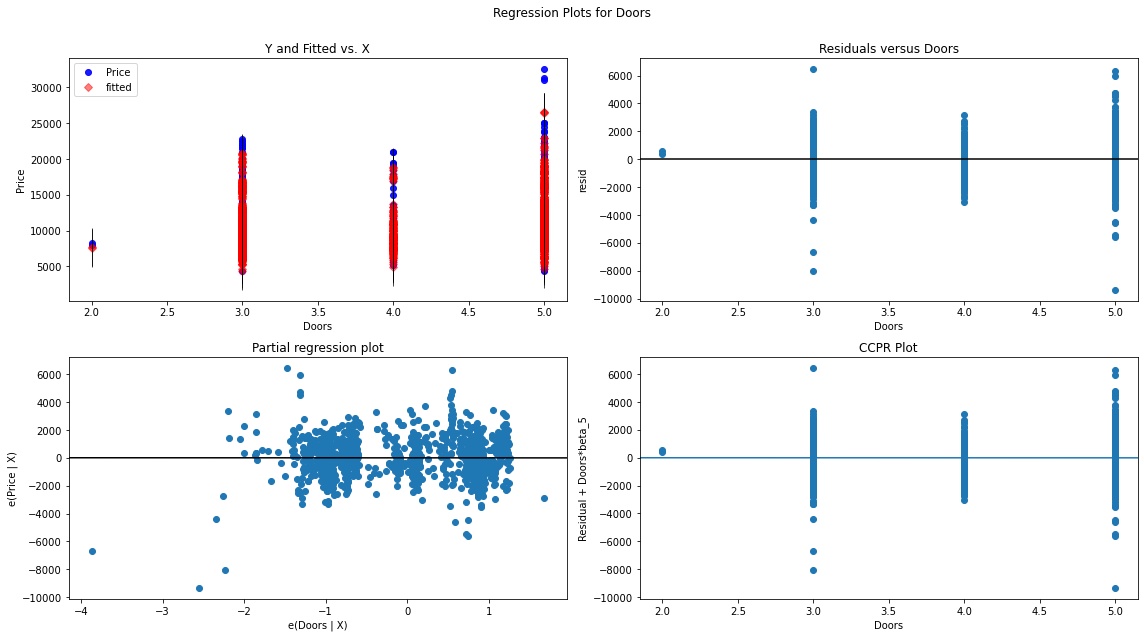

In [30]:
fig=plt.figure(figsize=(16,9))
fig=sm.graphics.plot_regress_exog(model,'Doors',fig=fig)

<IPython.core.display.Javascript object>

eval_env: 1


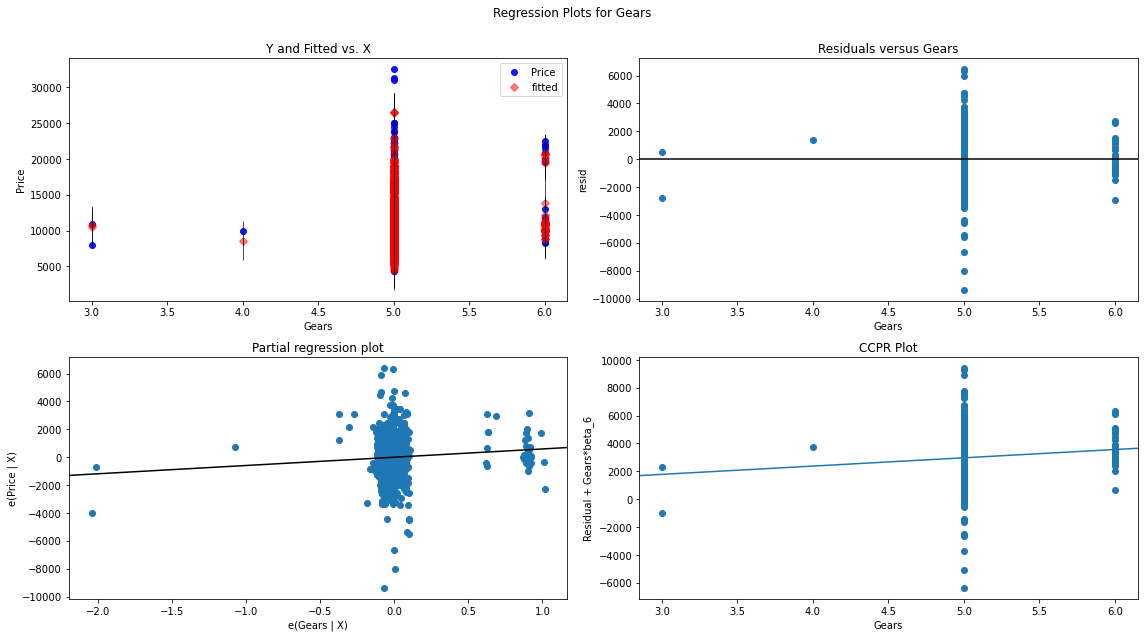

In [31]:
fig=plt.figure(figsize=(16,9))
fig=sm.graphics.plot_regress_exog(model,'Gears',fig=fig)

<IPython.core.display.Javascript object>

eval_env: 1


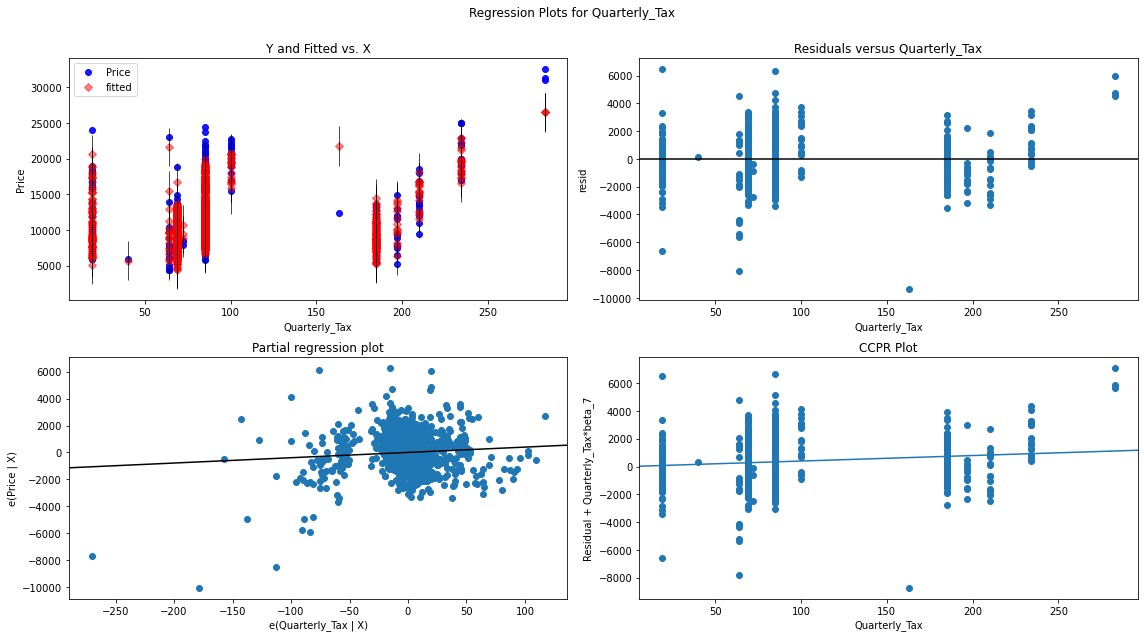

In [32]:
fig=plt.figure(figsize=(16,9))
fig=sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)

<IPython.core.display.Javascript object>

eval_env: 1


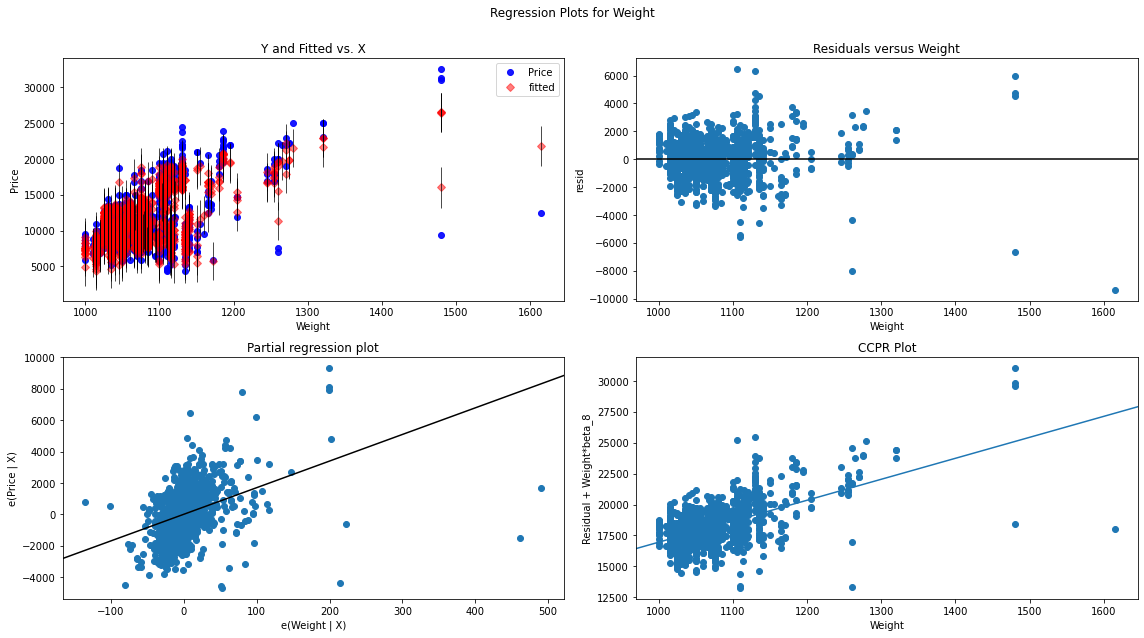

In [33]:
fig=plt.figure(figsize=(16,9))
fig=sm.graphics.plot_regress_exog(model,'Weight',fig=fig)

In [35]:
m1_age=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()
m1_age.rsquared

0.4693889998414589

In [37]:
m2_km=smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()
m2_km.rsquared

0.4308171891807999

In [38]:
m3_hp=smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()
m3_hp.rsquared

0.295487935604717

In [41]:
m4_cc=smf.ols('cc~Age_08_04+HP+KM+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()
m4_cc.rsquared

0.14081521776271833

In [42]:
m5_doors=smf.ols('Doors~Age_08_04+HP+cc+KM+Gears+Quarterly_Tax+Weight',data=df).fit()
m5_doors.rsquared

0.13537831877953144

In [43]:
m6_Gears=smf.ols('Gears~Age_08_04+HP+cc+Doors+KM+Quarterly_Tax+Weight',data=df).fit()
m6_Gears.rsquared

0.08985250841991732

In [45]:
m7_tax=smf.ols('Quarterly_Tax~Age_08_04+HP+cc+Doors+KM+Gears+Weight',data=df).fit()
m7_tax.rsquared

0.567367539183393

In [46]:
m8_tax=smf.ols('Weight~Age_08_04+HP+cc+Doors+KM+Gears+Quarterly_Tax',data=df).fit()
m8_tax.rsquared

0.6026100314743241

In [ ]:
# from the above 8 models (i.e. from m1 to m8). all r_squared values are not so high. so the VIF for each column will not be
# high. so we cannot say that there is colinearity between the columns.


In [47]:
model1=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=df).fit()
model1.rsquared
# from all the "reg exog plots" for all columns one by one, it is clearly seen that door has almost no relation with the
# price of car. also from r_squared values of model and model1, it is clearly seen that even if the doors is removed form the 
# prediction criteria, the r_squared value remains the same. so it is better to remove the doors columns to reduce the 
# compuatational complexity. 

0.8637625904386813

In [50]:
# df=df.drop(['Doors'],axis=1)
df

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,5,210,1165
1,13750,23,72937,90,2000,5,210,1165
2,13950,24,41711,90,2000,5,210,1165
3,14950,26,48000,90,2000,5,210,1165
4,13750,30,38500,90,2000,5,210,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,5,69,1025
1432,10845,72,19000,86,1300,5,69,1015
1433,8500,71,17016,86,1300,5,69,1015
1434,7250,70,16916,86,1300,5,69,1015


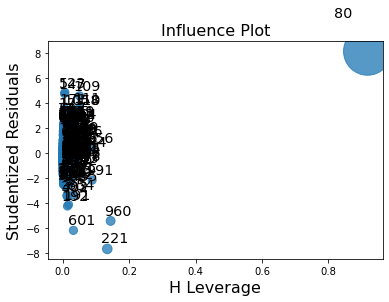

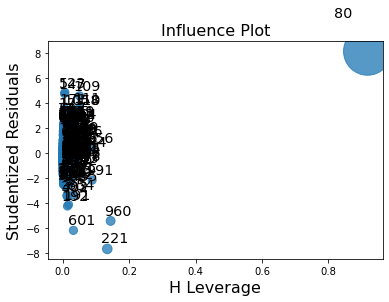

In [51]:
influence_plot(model1)

In [54]:
k=df.shape[1]
n=df.shape[0]
leverage_cutoff=3*(k+1)/n
leverage_cutoff

0.018802228412256268

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<StemContainer object of 3 artists>

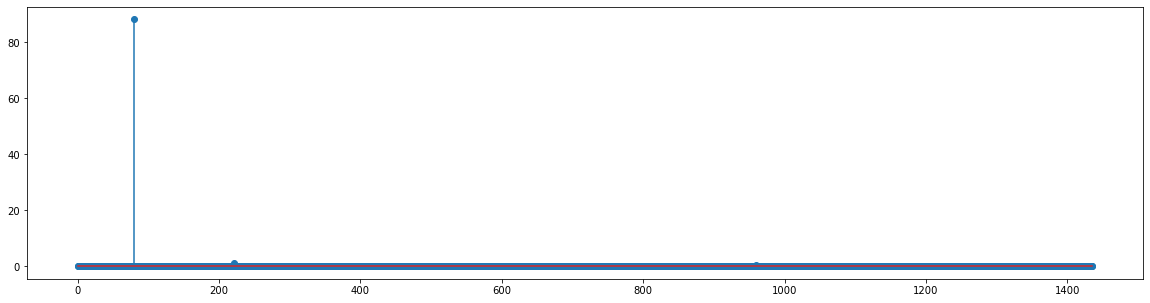

In [55]:
model1_influence=model1.get_influence()
(c,_)=model1_influence.cooks_distance
plt.figure(figsize=(20,5))
plt.stem(np.arange(len(df)),np.round(c,3))

In [59]:
np.where(c>1)

<IPython.core.display.Javascript object>

(array([ 80, 221], dtype=int64),)

In [61]:
df=df.drop(df.index[[80,221]],axis=0).reset_index()
df=df.drop(['index'],axis=1) # deleting 2 rows with cooks distance > 1 (outlier data)

In [62]:
df.head()

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,5,210,1165
1,13750,23,72937,90,2000,5,210,1165
2,13950,24,41711,90,2000,5,210,1165
3,14950,26,48000,90,2000,5,210,1165
4,13750,30,38500,90,2000,5,210,1170


In [63]:
df.shape

(1434, 8)

In [64]:
model2=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=df).fit()
model2.rsquared

0.8775929090646358

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<StemContainer object of 3 artists>

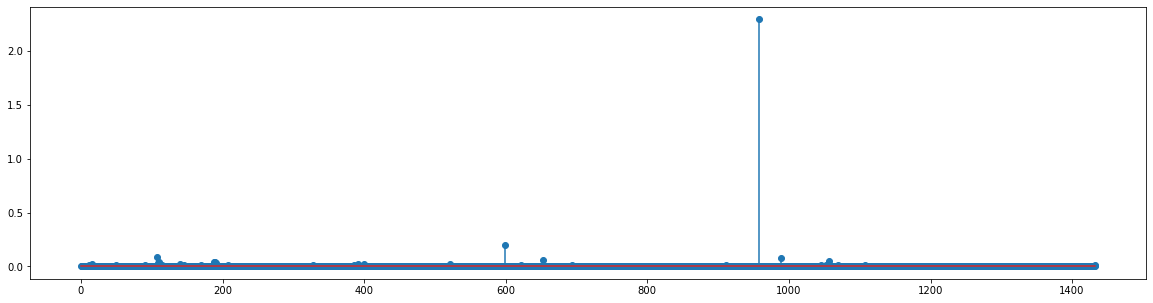

In [65]:
model2_influence=model2.get_influence()
(c,_)=model2_influence.cooks_distance
plt.figure(figsize=(20,5))
plt.stem(np.arange(len(df)),np.round(c,3))

In [71]:
np.where(c>0.2)# two rows found having cooks distance > 0.2. so deleting those rows from dataset

<IPython.core.display.Javascript object>

(array([599, 958], dtype=int64),)

In [72]:
df=df.drop(df.index[[599,958]],axis=0).reset_index()
df=df.drop(['index'],axis=1)
df.head()

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,5,210,1165
1,13750,23,72937,90,2000,5,210,1165
2,13950,24,41711,90,2000,5,210,1165
3,14950,26,48000,90,2000,5,210,1165
4,13750,30,38500,90,2000,5,210,1170


In [73]:
df.shape

(1432, 8)

In [74]:
model3=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=df).fit()
model3.rsquared

0.8882349616804389

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<StemContainer object of 3 artists>

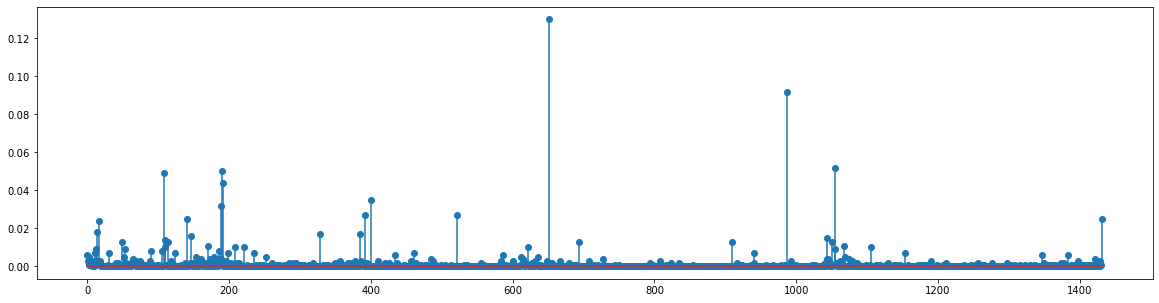

In [75]:
model3_influence=model3.get_influence()
(c,_)=model3_influence.cooks_distance
plt.figure(figsize=(20,5))
plt.stem(np.arange(len(df)),np.round(c,3))

In [77]:
np.where(c>0.09)

<IPython.core.display.Javascript object>

(array([651, 987], dtype=int64),)

In [78]:
df=df.drop(df.index[[651,987]],axis=0).reset_index()
df=df.drop(['index'],axis=1)
df.head()

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,5,210,1165
1,13750,23,72937,90,2000,5,210,1165
2,13950,24,41711,90,2000,5,210,1165
3,14950,26,48000,90,2000,5,210,1165
4,13750,30,38500,90,2000,5,210,1170


In [79]:
df.shape

(1430, 8)

In [80]:
model4=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=df).fit()
model4.rsquared

0.8905110970526983

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<StemContainer object of 3 artists>

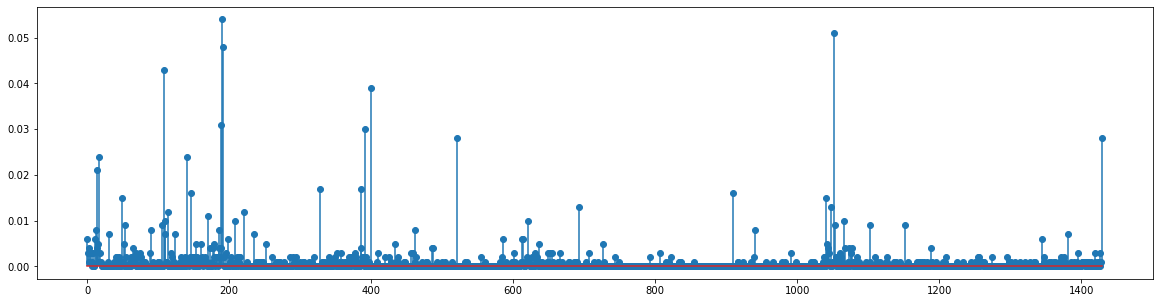

In [81]:
model4_influence=model4.get_influence()
(c,_)=model4_influence.cooks_distance
plt.figure(figsize=(20,5))
plt.stem(np.arange(len(df)),np.round(c,3))

In [ ]:
# after analysis using cooks distance, deleted 6 rows in total which increased the r_squared value from 0.86 to 0.89
# fro model4, cooks ditsance is very small, so can not delet further rows
# so final model is model4 with r_square=0.89